In [1]:
# Import many dataFrame for the Algorithm Comparison:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
from scipy import stats
import glob
import os
# pd.set_option('display.max_rows', 500)
from scipy.stats import gaussian_kde
from scipy.stats import sem
import seaborn as sns
from scipy.stats.mstats import winsorize

### Import our libraries
# some_file.py
import sys
# insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../data_preprocessing/')
import fixation_plots as plots
from utility import utilitiesCalc
import interpolationET as inter
counter = 21
lb_data = []
el_data = []
trial_data = []
targets_data = []
subject = 0
targets_data = []
el_blinks = pd.DataFrame()
el_blnk = []
s_gaze = 0
all_target = pd.DataFrame()
df_eyelink_raw = pd.DataFrame()
temp_blinks = []
temp_all_data = []
df_blinks_el = pd.DataFrame()
temp_raw_blinks = []
for i in range(1,counter):
    subject = subject + 1
    s_gaze = s_gaze + 1
    el_gaze = pd.read_csv("../data/el_data/p" + str(i) + '.csv', engine='python')
    el_blinks = pd.read_csv("../data/el_data/el_events/blinks/p" + str(i) + '_events.csv', engine='python')
    lb_gaze = pd.read_csv("../data/lb_data/timeseries_data/p" + str(i) + '_XYTC.csv', engine='python')
    print('loads files from =' + str(i))
    
   

    lb_gaze = utilitiesCalc.addParticipantNumberCol(subject, lb_gaze)
    lb_gaze = inter.formating_labvanced (lb_gaze)
    lb_gaze = lb_gaze[lb_gaze['Task_Name'] == "free_view"]
    
    
    el_gaze = utilitiesCalc.addParticipantNumberCol(subject, el_gaze)
    
    
    el_blinks = utilitiesCalc.addParticipantNumberCol(s_gaze, el_blinks)
    
         # Not enough targets detected Eyelink
    lb_gaze = lb_gaze[lb_gaze['Participant_Nr'] != 16]
    el_gaze = el_gaze[el_gaze['Participant_Nr'] != 16]
    el_blinks = el_blinks[el_blinks['Participant_Nr'] != 16]
    # Bad calibration Labvanced and lag
    lb_gaze = lb_gaze[lb_gaze['Participant_Nr'] != 17]
    el_gaze = el_gaze[el_gaze['Participant_Nr'] != 17]
    el_blinks = el_blinks[el_blinks['Participant_Nr'] != 17]
    # Delay between Labvanced 300hz and Eyelink 300hz resampled = -432504
    # Bad calibration Labvanced and lag 
    lb_gaze = lb_gaze[lb_gaze['Participant_Nr'] != 9]
    el_gaze = el_gaze[el_gaze['Participant_Nr'] != 9]
    el_blinks = el_blinks[el_blinks['Participant_Nr'] != 9]
    # Delay between Labvanced 300hz and Eyelink 300hz resampled = -68034
    # Bad calibration Labvanced and lag and # Not enough targets detected Eyetlink
    lb_gaze = lb_gaze[lb_gaze['Participant_Nr'] != 11]
    el_gaze = el_gaze[el_gaze['Participant_Nr'] != 11]
    el_blinks = el_blinks[el_blinks['Participant_Nr'] != 11]
    
    el = el_gaze.rename(columns={'X':'X_el','Y':'Y_el','Time':'t'})
    lb = lb_gaze.set_index('time_lb')
    
    
    el = el.set_index('t')
    
    def interpolation ():
    # Interpolate data

        df_temp = pd.concat([el, lb .index.to_frame()]).sort_index().interpolate()

        df_temp = df_temp[~df_temp.index.duplicated(keep='first')]
        df_interpolated = lb .merge(df_temp, left_index=True, right_index=True, how='left')

        df_interpolated = df_interpolated.drop(columns=['time_lb'])
        df_interpolated = df_interpolated.reset_index()

        return df_interpolated
    df_interpolated = interpolation()
    df_interpolated.reset_index(inplace=True)
    
    temp_all_data.append(df_interpolated)
    df = pd.concat(temp_all_data, axis=0, ignore_index=True)
    
    temp_blinks.append(el_blinks)
    df_eyelink_raw = pd.concat(temp_blinks, axis=0, ignore_index=True)
    
# #     temp_raw_blinks.append(df_blinks)

# #     df_blinks_el = pd.concat(temp_raw_blinks, axis=0, ignore_index=True)
# df.to_csv('../data/free_view_interpolated/free_view_inter.csv', index = False)

loads files from =1
loads files from =2
loads files from =3
loads files from =4
loads files from =5
loads files from =6
loads files from =7
loads files from =8
loads files from =9
loads files from =10
loads files from =11
loads files from =12
loads files from =13
loads files from =14
loads files from =15
loads files from =16
loads files from =17
loads files from =18
loads files from =19
loads files from =20


In [2]:
df_blinks_el

""


In [3]:
lb_gaze

,Block_Nr,Block_Name,Task_Nr,Task_Name,Trial_Nr,Trial_Id,Exp_Subject_Id,Rec_Session_Id,Session_Nr,timestamp,X_lb,Y_lb,time_lb,c,Participant_Nr
9585,1,block_1,7,free_view,1,4,451069,514401,1,1656920133773,641.640970,516.425711,1656920133747,1.00000,20
9586,1,block_1,7,free_view,1,4,451069,514401,1,1656920133846,651.426398,483.930950,1656920133785,1.00000,20
9587,1,block_1,7,free_view,1,4,451069,514401,1,1656920133872,639.011536,476.966259,1656920133851,1.00000,20
9588,1,block_1,7,free_view,1,4,451069,514401,1,1656920133901,676.132219,540.376215,1656920133885,1.00000,20
9589,1,block_1,7,free_view,1,4,451069,514401,1,1656920133944,696.353409,523.956871,1656920133918,1.00000,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11182,1,block_1,7,free_view,18,11,451069,514401,1,1656920233778,705.093527,510.103476,1656920233760,0.99797,20
11183,1,block_1,7,free_view,18,11,451069,514401,1,1656920233813,723.489640,449.186084,1656920233793,1.00000,20
11184,1,block_1,7,free_view,18,11,451069,514401,1,1656920233845,771.267121,466.154703,1656920233826,1.00000,20
11185,1,block_1,7,free_view,18,11,451069,514401,1,1656920233870,739.129214,434.455687,1656920233859,1.00000,20


In [4]:
# # lb_gaze = lb_gaze.loc[lb_gaze['Trial_Nr'] == 18]

# fig, ax = plt.subplots(1, figsize=(12, 6))
# fig.patch.set_facecolor('white')
# labvance_start = lb_gaze.time_lb.values[0]

# el_gaze =el_gaze.loc[el_gaze['Time'] > labvance_start]
# df_blinks_el = df_blinks_el.loc[df_blinks_el['Time'] > labvance_start]
# df_blinks_el['data_loss'] = 0

# lb_gaze['t_from_0'] = lb_gaze['time_lb'].diff().cumsum().fillna(0)
# df_blinks_el['t_from_0'] = df_blinks_el['Time'].diff().cumsum().fillna(0)
# # el_gaze_since_Labvanced
# # plt.scatter(el_gaze.Time, el_gaze.X, color = 'red', s=5, label='Good Data Eyelink')
# plt.scatter(lb_gaze.t_from_0, lb_gaze.c, color = 'blue', s=5, label='Labvanced Confidence')
# plt.scatter(df_blinks_el.t_from_0, df_blinks_el.data_loss, s=10, color = 'red', label='Blinks/Data Loss')
# # plt.scatter(lb_gaze.time_lb, lb_gaze.X_lb, color = 'blue', s=5, label='Labvanced')
# ax.set_title('LAST TRIAL Gaze Data (X-coordinations) from participant = 1', fontsize=21)
# ax.set_ylabel('Confidence Level',fontsize=22)
# ax.set_xlabel('Time (seconds)',fontsize=20)

# #     ax.legend(fontsize="x-large", loc='lower right') # using a named size
# ax.grid(linewidth = 0.4)
# ax.legend()
# ax.grid()
# plt.plot()

In [5]:
df_eyelink_raw

,Start,End,Participant_Nr
0,1643102855667,1643102855717,1
1,1643102857051,1643102857093,1
2,1643102858319,1643102858783,1
3,1643102861988,1643102862068,1
4,1643102865374,1643102865770,1
...,...,...,...
8110,1656920244765,1656920244867,20
8111,1656920245327,1656920245441,20
8112,1656920247572,1656920247872,20
8113,1656920248490,1656920248642,20


In [6]:
def changeToVisualDegrees(df):
    from math import atan2, degrees
    h = 21 # Monitor height in cm
    l = 42 # Montir length in cm
    d = 60 # Distance between monitor and participant in cm
    ver = 900 # Vertical resolution of the monitor
    hor = 1440
    # Calculate the number of degrees that correspond to a single pixel. This will
    # generally be a very small value, something like 0.03.
    deg_per_px = degrees(atan2(.5*h, d)) / (.5*ver)
    df[["X_lb","Y_lb","X_el","Y_el"]] = df[["X_lb","Y_lb","X_el","Y_el"]]*deg_per_px
    print('%s degrees correspond to a single pixel horizontal' % deg_per_px)
changeToVisualDegrees(df)

0.0220583233481149 degrees correspond to a single pixel horizontal


In [7]:
df

,index,time_lb,Block_Nr,Block_Name,Task_Nr,Task_Name,Trial_Nr,Trial_Id,Exp_Subject_Id,Rec_Session_Id,Session_Nr,timestamp,X_lb,Y_lb,c,Participant_Nr_x,X_el,Y_el,Tracker_Time,Participant_Nr_y
0,0,1643104412839,1,block_1,7,free_view,1,17,361162,401562,1,1643104412867,14.207223,10.022144,1.00000,1,16.087135,9.339494,2115212.0,1.0
1,1,1643104412872,1,block_1,7,free_view,1,17,361162,401562,1,1643104412885,16.641919,10.512644,1.00000,1,16.051842,9.368170,2115244.0,1.0
2,2,1643104412906,1,block_1,7,free_view,1,17,361162,401562,1,1643104412942,15.212826,9.135067,1.00000,1,16.035298,9.328465,2115278.0,1.0
3,3,1643104412971,1,block_1,7,free_view,1,17,361162,401562,1,1643104412988,16.352261,10.414556,1.00000,1,16.115811,9.342803,2115344.0,1.0
4,4,1643104413004,1,block_1,7,free_view,1,17,361162,401562,1,1643104413021,16.297512,10.984348,1.00000,1,16.099267,9.324053,2115376.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25468,1580,1656920233760,1,block_1,7,free_view,18,11,451069,514401,1,1656920233778,15.553181,11.252027,0.99797,20,18.436347,6.323018,3805646.0,20.0
25469,1581,1656920233793,1,block_1,7,free_view,18,11,451069,514401,1,1656920233813,15.958968,9.908292,1.00000,20,18.328261,6.103538,3805678.0,20.0
25470,1582,1656920233826,1,block_1,7,free_view,18,11,451069,514401,1,1656920233845,17.012860,10.282591,1.00000,20,18.394436,6.189566,3805712.0,20.0
25471,1583,1656920233859,1,block_1,7,free_view,18,11,451069,514401,1,1656920233870,16.303951,9.583364,1.00000,20,19.824918,6.340665,3805744.0,20.0


In [8]:
blinks = []
df_blinks = pd.DataFrame()
df_no_b = pd.DataFrame()
for index, row in df_eyelink_raw.iterrows():
    blink_offset = row['End']
    blink_onset = row['Start']
    within_blinks = df.loc[(df.time_lb <= blink_offset) & (df.time_lb >= blink_onset)]
    blinks.append(within_blinks)

df_blinks = pd.concat(blinks, axis=0, ignore_index=False)
# df.drop(df_blinks.index, inplace=True)

In [9]:
def lagCrossCorr(df):
    means_c_arr = []
    for i in range(10, 510, 10):
        
        # add 1 ms for each interation
        print('Timestamp before iteration ' + str(df['time_lb'].values[0]))
        df['time_lb_changed'] = df['time_lb'] - i 
        print('Timestamp after ' + str(df['time_lb_changed'].values[0]))
        # Compute blinks with new time value (+1):
        blinks = []
        df_blinks = pd.DataFrame()
        df_no_b = pd.DataFrame()
        
        for index, row in df_eyelink_raw.iterrows():
            # Create onset and offset time
            blink_offset = row['End']
            blink_onset = row['Start']
            # Take value between onset and offset to establish timestamps for blinks
            within_blinks = df.loc[(df.time_lb_changed <= blink_offset) & (df.time_lb_changed >= blink_onset)]
            blinks.append(within_blinks)
        # Create DataFrame from blinks
        df_blinks = pd.concat(blinks, axis=0, ignore_index=False)
        # Take mean value of the C
        mean_c = df_blinks.c.mean()
        
        # Create arr with means
        means_c_arr.append(mean_c)
        print(means_c_arr)
    return means_c_arr

In [10]:
means_c_arr = lagCrossCorr(df)

Timestamp before iteration 1643104412839
Timestamp after 1643104412829
[0.795234885494567]
Timestamp before iteration 1643104412839
Timestamp after 1643104412819
[0.795234885494567, 0.7767234297989212]
Timestamp before iteration 1643104412839
Timestamp after 1643104412809
[0.795234885494567, 0.7767234297989212, 0.7622581687682308]
Timestamp before iteration 1643104412839
Timestamp after 1643104412799
[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602]
Timestamp before iteration 1643104412839
Timestamp after 1643104412789
[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602, 0.7071772062399022]
Timestamp before iteration 1643104412839
Timestamp after 1643104412779
[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602, 0.7071772062399022, 0.6608883520477107]
Timestamp before iteration 1643104412839
Timestamp after 1643104412769
[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602, 0.7

[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602, 0.7071772062399022, 0.6608883520477107, 0.6194522124441855, 0.5646958897530572, 0.48935900975930446, 0.4259488505522226, 0.3701043792739724, 0.322668473298382, 0.2920542186582689, 0.25900159141854545, 0.22962480153160728, 0.22579007001599, 0.20207435239090554, 0.19872410977932742, 0.19749186480968692, 0.19579889650805132, 0.20978161687390975, 0.22400692734999725, 0.24547701971568217, 0.2623478012644835, 0.2927817864998648, 0.3282846312690564]
Timestamp before iteration 1643104412839
Timestamp after 1643104412569
[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602, 0.7071772062399022, 0.6608883520477107, 0.6194522124441855, 0.5646958897530572, 0.48935900975930446, 0.4259488505522226, 0.3701043792739724, 0.322668473298382, 0.2920542186582689, 0.25900159141854545, 0.22962480153160728, 0.22579007001599, 0.20207435239090554, 0.19872410977932742, 0.19749186480968692, 0.19579889650805132

[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602, 0.7071772062399022, 0.6608883520477107, 0.6194522124441855, 0.5646958897530572, 0.48935900975930446, 0.4259488505522226, 0.3701043792739724, 0.322668473298382, 0.2920542186582689, 0.25900159141854545, 0.22962480153160728, 0.22579007001599, 0.20207435239090554, 0.19872410977932742, 0.19749186480968692, 0.19579889650805132, 0.20978161687390975, 0.22400692734999725, 0.24547701971568217, 0.2623478012644835, 0.2927817864998648, 0.3282846312690564, 0.3578042506884101, 0.3955335366709617, 0.4328086543766918, 0.4837010396356126, 0.5245250226098188, 0.5638609203043281, 0.6040617074774093, 0.6346051504120495, 0.6602455669723174, 0.6837122492835327, 0.7053623027527863, 0.7268159475040137]
Timestamp before iteration 1643104412839
Timestamp after 1643104412449
[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602, 0.7071772062399022, 0.6608883520477107, 0.6194522124441855, 0.5646958897530572, 0.

[0.795234885494567, 0.7767234297989212, 0.7622581687682308, 0.7396805229296602, 0.7071772062399022, 0.6608883520477107, 0.6194522124441855, 0.5646958897530572, 0.48935900975930446, 0.4259488505522226, 0.3701043792739724, 0.322668473298382, 0.2920542186582689, 0.25900159141854545, 0.22962480153160728, 0.22579007001599, 0.20207435239090554, 0.19872410977932742, 0.19749186480968692, 0.19579889650805132, 0.20978161687390975, 0.22400692734999725, 0.24547701971568217, 0.2623478012644835, 0.2927817864998648, 0.3282846312690564, 0.3578042506884101, 0.3955335366709617, 0.4328086543766918, 0.4837010396356126, 0.5245250226098188, 0.5638609203043281, 0.6040617074774093, 0.6346051504120495, 0.6602455669723174, 0.6837122492835327, 0.7053623027527863, 0.7268159475040137, 0.741966324422434, 0.7570917433302126, 0.7754942988892938, 0.7937776252101921, 0.7967791693755667, 0.8119217097938094, 0.8251851270483689, 0.8267834741680979, 0.83959855463229]
Timestamp before iteration 1643104412839
Timestamp after

In [11]:
min(means_c_arr)

0.19579889650805132

In [12]:
df_blinks

,index,time_lb,Block_Nr,Block_Name,Task_Nr,Task_Name,Trial_Nr,Trial_Id,Exp_Subject_Id,Rec_Session_Id,Session_Nr,timestamp,X_lb,Y_lb,c,Participant_Nr_x,X_el,Y_el,Tracker_Time,Participant_Nr_y
476,476,1643104439277,1,block_1,7,free_view,6,12,361162,401562,1,1643104439295,5.662531,19.828140,1.000000,1,0.0,0.0,2141654.0,1.0
854,854,1643104470822,1,block_1,7,free_view,10,5,361162,401562,1,1643104470839,10.897712,21.479166,0.701300,1,0.0,0.0,2173204.0,1.0
855,855,1643104470855,1,block_1,7,free_view,10,5,361162,401562,1,1643104470872,10.551255,18.989403,0.483864,1,0.0,0.0,2173236.0,1.0
856,856,1643104470888,1,block_1,7,free_view,10,5,361162,401562,1,1643104470909,13.498511,12.998585,0.487788,1,0.0,0.0,2173270.0,1.0
1707,121,1643114378297,1,block_1,7,free_view,2,1,361229,401656,1,1643114378325,17.450743,5.476381,0.888807,2,0.0,0.0,1610971.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24999,1111,1656920199552,1,block_1,7,free_view,13,7,451069,514401,1,1656920199568,3.811061,19.772858,1.000000,20,0.0,0.0,3771430.0,20.0
25000,1112,1656920199585,1,block_1,7,free_view,13,7,451069,514401,1,1656920199604,4.041769,19.822500,1.000000,20,0.0,0.0,3771464.0,20.0
25144,1256,1656920220061,1,block_1,7,free_view,15,8,451069,514401,1,1656920220078,15.586650,13.794401,1.000000,20,0.0,0.0,3791944.0,20.0
25145,1257,1656920220094,1,block_1,7,free_view,15,8,451069,514401,1,1656920220114,14.593969,17.758084,0.050366,20,0.0,0.0,3791978.0,20.0


In [13]:
df_no_b_c = df.c.mean()
print('NO BLINKS Grouped by - ' + str(df.groupby('Participant_Nr_x').c.mean()))
print('over all participants M=' + str(df_no_b_c) + ' SD= ' + str(df.c.std()))

NO BLINKS Grouped by - Participant_Nr_x
1     0.890408
2     0.870415
3     0.747472
4     0.904732
5     0.850887
6     0.930747
7     0.954727
8     0.867987
10    0.907698
12    0.918543
13    0.847743
14    0.904468
15    0.886325
18    0.892047
19    0.905299
20    0.890030
Name: c, dtype: float64
over all participants M=0.8857049401054023 SD= 0.2114427594399376


In [14]:
df

,index,time_lb,Block_Nr,Block_Name,Task_Nr,Task_Name,Trial_Nr,Trial_Id,Exp_Subject_Id,Rec_Session_Id,...,timestamp,X_lb,Y_lb,c,Participant_Nr_x,X_el,Y_el,Tracker_Time,Participant_Nr_y,time_lb_changed
0,0,1643104412839,1,block_1,7,free_view,1,17,361162,401562,...,1643104412867,14.207223,10.022144,1.00000,1,16.087135,9.339494,2115212.0,1.0,1643104412339
1,1,1643104412872,1,block_1,7,free_view,1,17,361162,401562,...,1643104412885,16.641919,10.512644,1.00000,1,16.051842,9.368170,2115244.0,1.0,1643104412372
2,2,1643104412906,1,block_1,7,free_view,1,17,361162,401562,...,1643104412942,15.212826,9.135067,1.00000,1,16.035298,9.328465,2115278.0,1.0,1643104412406
3,3,1643104412971,1,block_1,7,free_view,1,17,361162,401562,...,1643104412988,16.352261,10.414556,1.00000,1,16.115811,9.342803,2115344.0,1.0,1643104412471
4,4,1643104413004,1,block_1,7,free_view,1,17,361162,401562,...,1643104413021,16.297512,10.984348,1.00000,1,16.099267,9.324053,2115376.0,1.0,1643104412504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25468,1580,1656920233760,1,block_1,7,free_view,18,11,451069,514401,...,1656920233778,15.553181,11.252027,0.99797,20,18.436347,6.323018,3805646.0,20.0,1656920233260
25469,1581,1656920233793,1,block_1,7,free_view,18,11,451069,514401,...,1656920233813,15.958968,9.908292,1.00000,20,18.328261,6.103538,3805678.0,20.0,1656920233293
25470,1582,1656920233826,1,block_1,7,free_view,18,11,451069,514401,...,1656920233845,17.012860,10.282591,1.00000,20,18.394436,6.189566,3805712.0,20.0,1656920233326
25471,1583,1656920233859,1,block_1,7,free_view,18,11,451069,514401,...,1656920233870,16.303951,9.583364,1.00000,20,19.824918,6.340665,3805744.0,20.0,1656920233359


In [15]:
df_blinks

,index,time_lb,Block_Nr,Block_Name,Task_Nr,Task_Name,Trial_Nr,Trial_Id,Exp_Subject_Id,Rec_Session_Id,Session_Nr,timestamp,X_lb,Y_lb,c,Participant_Nr_x,X_el,Y_el,Tracker_Time,Participant_Nr_y
476,476,1643104439277,1,block_1,7,free_view,6,12,361162,401562,1,1643104439295,5.662531,19.828140,1.000000,1,0.0,0.0,2141654.0,1.0
854,854,1643104470822,1,block_1,7,free_view,10,5,361162,401562,1,1643104470839,10.897712,21.479166,0.701300,1,0.0,0.0,2173204.0,1.0
855,855,1643104470855,1,block_1,7,free_view,10,5,361162,401562,1,1643104470872,10.551255,18.989403,0.483864,1,0.0,0.0,2173236.0,1.0
856,856,1643104470888,1,block_1,7,free_view,10,5,361162,401562,1,1643104470909,13.498511,12.998585,0.487788,1,0.0,0.0,2173270.0,1.0
1707,121,1643114378297,1,block_1,7,free_view,2,1,361229,401656,1,1643114378325,17.450743,5.476381,0.888807,2,0.0,0.0,1610971.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24999,1111,1656920199552,1,block_1,7,free_view,13,7,451069,514401,1,1656920199568,3.811061,19.772858,1.000000,20,0.0,0.0,3771430.0,20.0
25000,1112,1656920199585,1,block_1,7,free_view,13,7,451069,514401,1,1656920199604,4.041769,19.822500,1.000000,20,0.0,0.0,3771464.0,20.0
25144,1256,1656920220061,1,block_1,7,free_view,15,8,451069,514401,1,1656920220078,15.586650,13.794401,1.000000,20,0.0,0.0,3791944.0,20.0
25145,1257,1656920220094,1,block_1,7,free_view,15,8,451069,514401,1,1656920220114,14.593969,17.758084,0.050366,20,0.0,0.0,3791978.0,20.0


In [16]:
df_blinks_c = df_blinks.c.mean()
df_blinks_c

0.8155057417964314

In [17]:
print('BLINKS Grouped by - ' + str(df_blinks.groupby('Participant_Nr_x').c.mean()))
print('over all participants M=' + str(df_blinks.c.mean()) + ' SD= ' + str(df_blinks.c.std()))

BLINKS Grouped by - Participant_Nr_x
1     0.668238
2     0.960434
3     0.567458
4     0.822333
7     0.990907
8     0.760973
10    0.564661
12    0.872316
13    0.648537
14    0.822244
15    1.000000
18    0.856064
19    0.955213
20    0.840300
Name: c, dtype: float64
over all participants M=0.8155057417964314 SD= 0.3197749099132014


In [18]:
df.head(835)

,index,time_lb,Block_Nr,Block_Name,Task_Nr,Task_Name,Trial_Nr,Trial_Id,Exp_Subject_Id,Rec_Session_Id,...,timestamp,X_lb,Y_lb,c,Participant_Nr_x,X_el,Y_el,Tracker_Time,Participant_Nr_y,time_lb_changed
0,0,1643104412839,1,block_1,7,free_view,1,17,361162,401562,...,1643104412867,14.207223,10.022144,1.000000,1,16.087135,9.339494,2115212.0,1.0,1643104412339
1,1,1643104412872,1,block_1,7,free_view,1,17,361162,401562,...,1643104412885,16.641919,10.512644,1.000000,1,16.051842,9.368170,2115244.0,1.0,1643104412372
2,2,1643104412906,1,block_1,7,free_view,1,17,361162,401562,...,1643104412942,15.212826,9.135067,1.000000,1,16.035298,9.328465,2115278.0,1.0,1643104412406
3,3,1643104412971,1,block_1,7,free_view,1,17,361162,401562,...,1643104412988,16.352261,10.414556,1.000000,1,16.115811,9.342803,2115344.0,1.0,1643104412471
4,4,1643104413004,1,block_1,7,free_view,1,17,361162,401562,...,1643104413021,16.297512,10.984348,1.000000,1,16.099267,9.324053,2115376.0,1.0,1643104412504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
830,830,1643104469984,1,block_1,7,free_view,10,5,361162,401562,...,1643104470009,10.817411,17.959361,1.000000,1,15.188259,14.651138,2172366.0,1.0,1643104469484
831,831,1643104470017,1,block_1,7,free_view,10,5,361162,401562,...,1643104470039,11.647499,19.311559,1.000000,1,15.247816,14.670991,2172398.0,1.0,1643104469517
832,832,1643104470050,1,block_1,7,free_view,10,5,361162,401562,...,1643104470074,11.721150,19.143116,1.000000,1,15.279801,14.604816,2172432.0,1.0,1643104469550
833,833,1643104470083,1,block_1,7,free_view,10,5,361162,401562,...,1643104470092,11.060095,18.143810,1.000000,1,15.241199,14.618051,2172464.0,1.0,1643104469583


Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


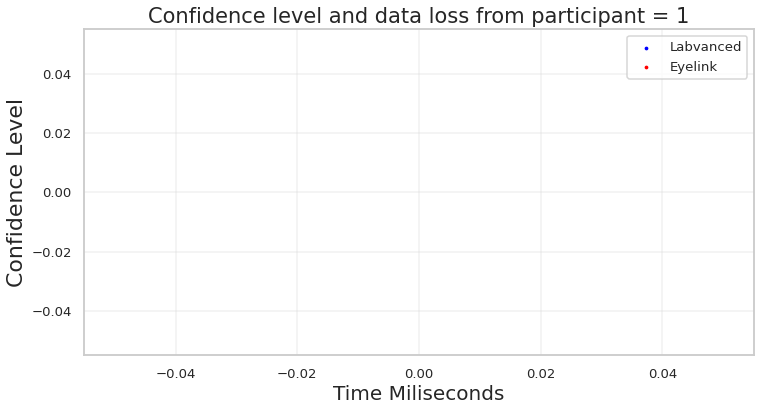

     index        time_lb  Block_Nr Block_Name  Task_Nr  Task_Name  Trial_Nr  \
854    854  1643104470822         1    block_1        7  free_view        10   
855    855  1643104470855         1    block_1        7  free_view        10   
856    856  1643104470888         1    block_1        7  free_view        10   

     Trial_Id  Exp_Subject_Id  Rec_Session_Id  ...      timestamp       X_lb  \
854         5          361162          401562  ...  1643104470839  10.897712   
855         5          361162          401562  ...  1643104470872  10.551255   
856         5          361162          401562  ...  1643104470909  13.498511   

          Y_lb         c  Participant_Nr_x  X_el  Y_el  Tracker_Time  \
854  21.479166  0.701300                 1   0.0   0.0     2173204.0   
855  18.989403  0.483864                 1   0.0   0.0     2173236.0   
856  12.998585  0.487788                 1   0.0   0.0     2173270.0   

     Participant_Nr_y  t_from_0  
854               1.0   31545.0  
8

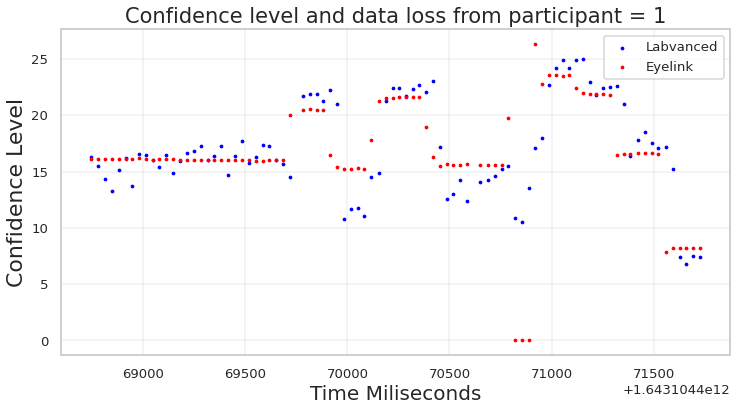

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


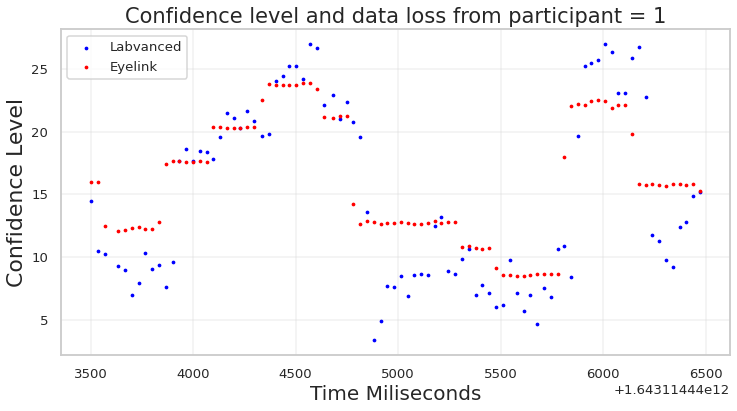

      index        time_lb  Block_Nr Block_Name  Task_Nr  Task_Name  Trial_Nr  \
3995    818  1643210015024         1    block_1        7  free_view        10   

      Trial_Id  Exp_Subject_Id  Rec_Session_Id  ...      timestamp       X_lb  \
3995        12          362397          403065  ...  1643210015047  14.581245   

           Y_lb         c  Participant_Nr_x  X_el  Y_el  Tracker_Time  \
3995  13.217555  0.775845                 3   0.0   0.0     3021720.0   

      Participant_Nr_y     t_from_0  
3995               3.0  105575747.0  

[1 rows x 21 columns]


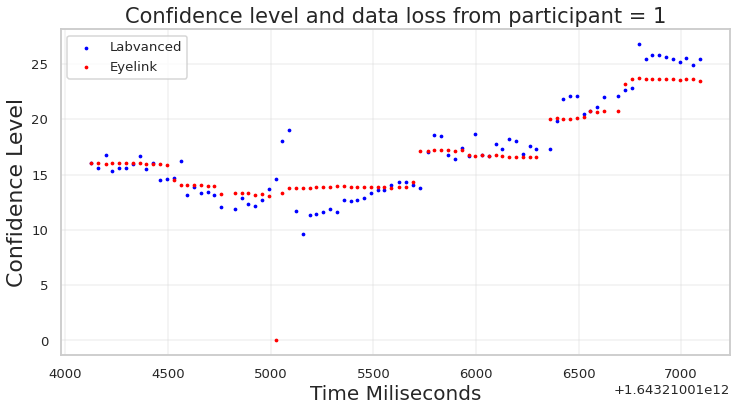

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


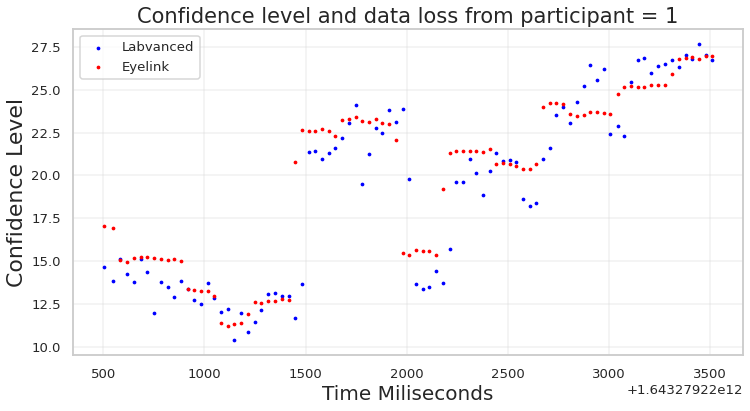

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


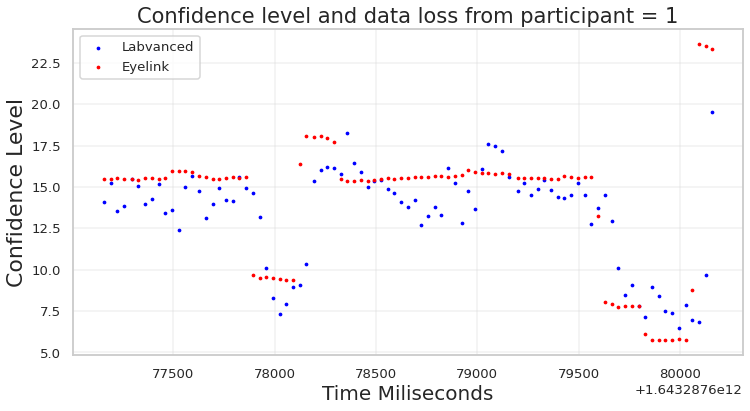

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


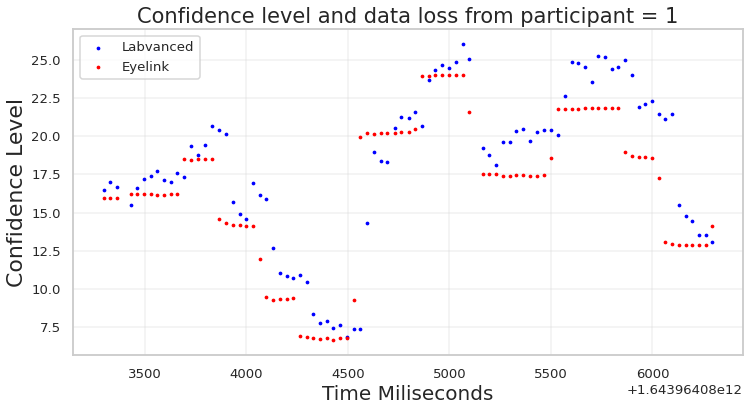

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


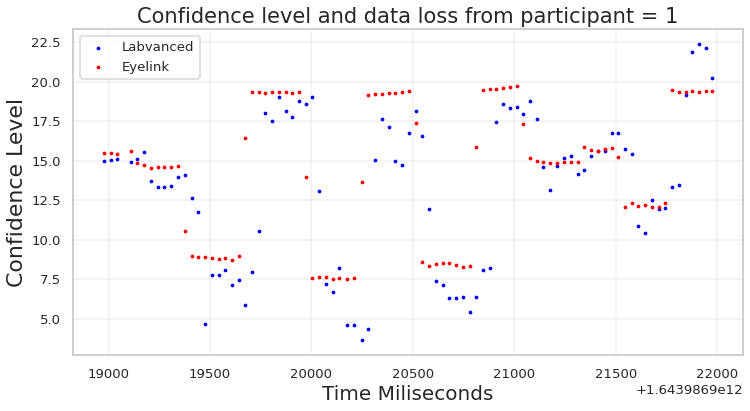

       index        time_lb  Block_Nr Block_Name  Task_Nr  Task_Name  \
11952    796  1645010016985         1    block_1        7  free_view   
11953    797  1645010017018         1    block_1        7  free_view   

       Trial_Nr  Trial_Id  Exp_Subject_Id  Rec_Session_Id  ...      timestamp  \
11952        10        16          374007          418186  ...  1645010017011   
11953        10        16          374007          418186  ...  1645010017053   

            X_lb       Y_lb    c  Participant_Nr_x  X_el  Y_el  Tracker_Time  \
11952  22.289593  10.308059  1.0                 8   0.0   0.0     2683635.0   
11953  17.211318   4.703125  1.0                 8   0.0   0.0     2683667.0   

       Participant_Nr_y      t_from_0  
11952               8.0  1.905578e+09  
11953               8.0  1.905578e+09  

[2 rows x 21 columns]


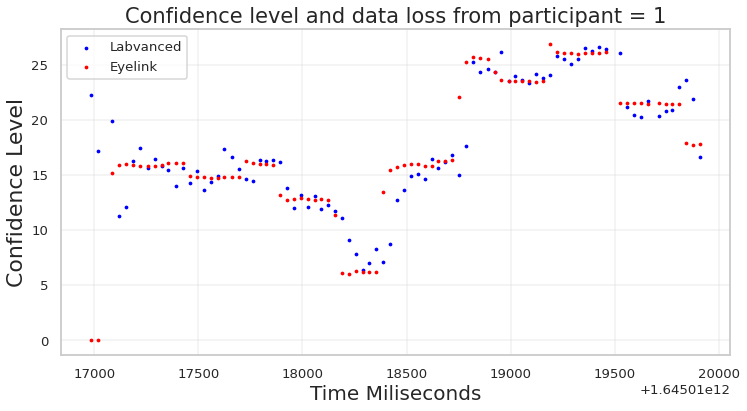

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


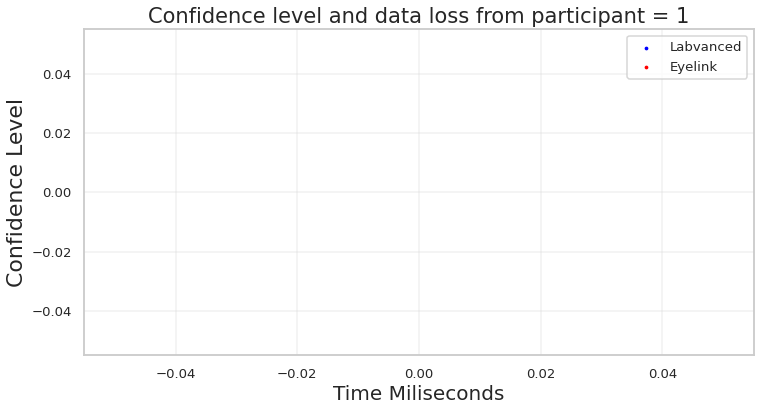

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


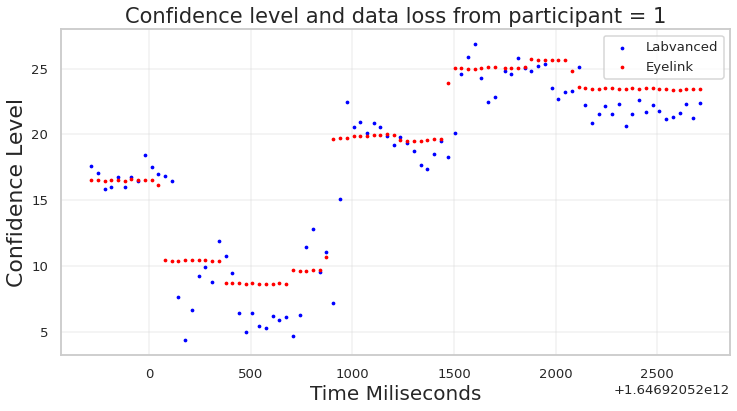

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


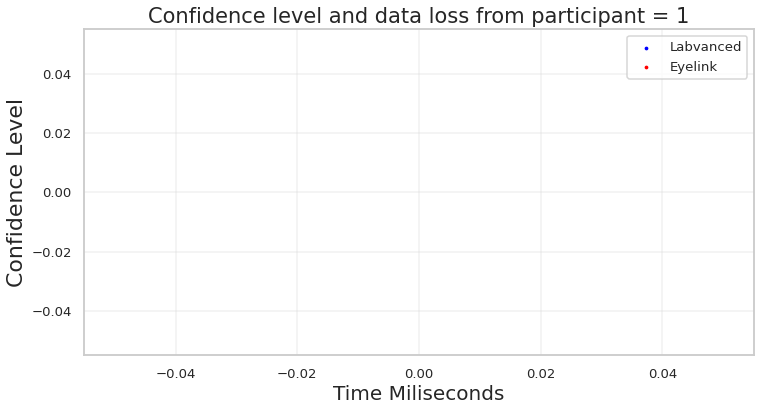

       index        time_lb  Block_Nr Block_Name  Task_Nr  Task_Name  \
15239    879  1641994407472         1    block_1        7  free_view   
15240    880  1641994407505         1    block_1        7  free_view   

       Trial_Nr  Trial_Id  Exp_Subject_Id  Rec_Session_Id  ...      timestamp  \
15239        10         2          349804          387482  ...  1641994407493   
15240        10         2          349804          387482  ...  1641994407523   

            X_lb       Y_lb         c  Participant_Nr_x  X_el  Y_el  \
15239  16.429400  12.291836  0.849121                12   0.0   0.0   
15240  10.921007  11.674227  0.895511                12   0.0   0.0   

       Tracker_Time  Participant_Nr_y      t_from_0  
15239     1795287.0              12.0 -1.110032e+09  
15240     1795321.0              12.0 -1.110032e+09  

[2 rows x 21 columns]


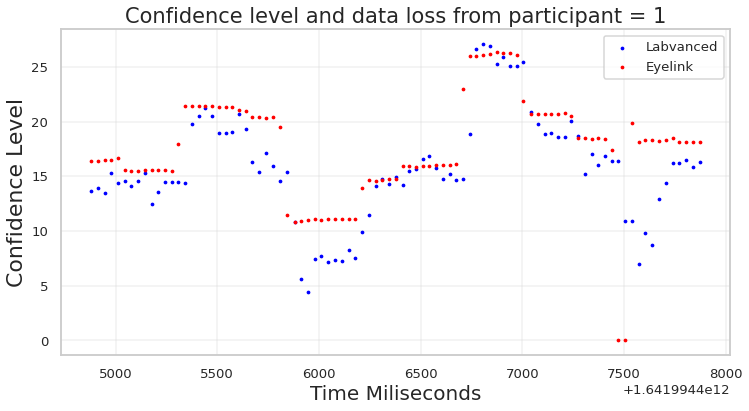

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


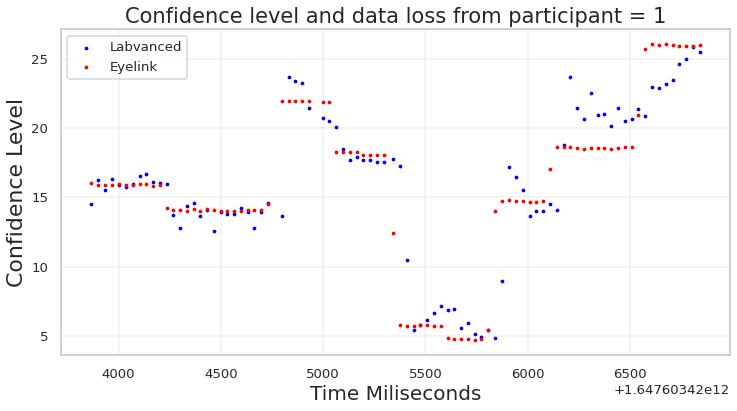

       index        time_lb  Block_Nr Block_Name  Task_Nr  Task_Name  \
18365    810  1642000496021         1    block_1        7  free_view   
18366    811  1642000496054         1    block_1        7  free_view   
18367    812  1642000496088         1    block_1        7  free_view   
18401    846  1642000497259         1    block_1        7  free_view   

       Trial_Nr  Trial_Id  Exp_Subject_Id  Rec_Session_Id  ...      timestamp  \
18365        10         7          349904          387595  ...  1642000496044   
18366        10         7          349904          387595  ...  1642000496067   
18367        10         7          349904          387595  ...  1642000496112   
18401        10         7          349904          387595  ...  1642000497276   

            X_lb       Y_lb         c  Participant_Nr_x  X_el  Y_el  \
18365  13.467402   7.980859  1.000000                14   0.0   0.0   
18366  13.467402   7.980859  1.000000                14   0.0   0.0   
18367  10.563408   7

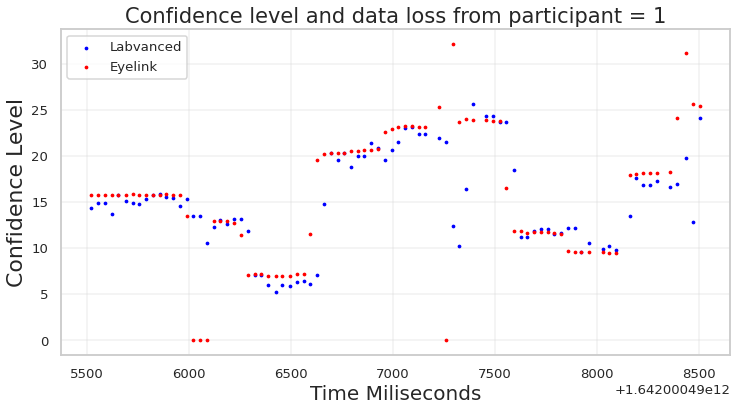

       index        time_lb  Block_Nr Block_Name  Task_Nr  Task_Name  \
19979    832  1649146279986         1    block_1        7  free_view   
19980    833  1649146280019         1    block_1        7  free_view   
19981    834  1649146280052         1    block_1        7  free_view   
19982    835  1649146280085         1    block_1        7  free_view   
19983    836  1649146280118         1    block_1        7  free_view   
19984    837  1649146280151         1    block_1        7  free_view   
19985    838  1649146280184         1    block_1        7  free_view   
19986    839  1649146280218         1    block_1        7  free_view   
19987    840  1649146280250         1    block_1        7  free_view   
19988    841  1649146280283         1    block_1        7  free_view   
19989    842  1649146280316         1    block_1        7  free_view   
19990    843  1649146280349         1    block_1        7  free_view   

       Trial_Nr  Trial_Id  Exp_Subject_Id  Rec_Session_Id  ... 

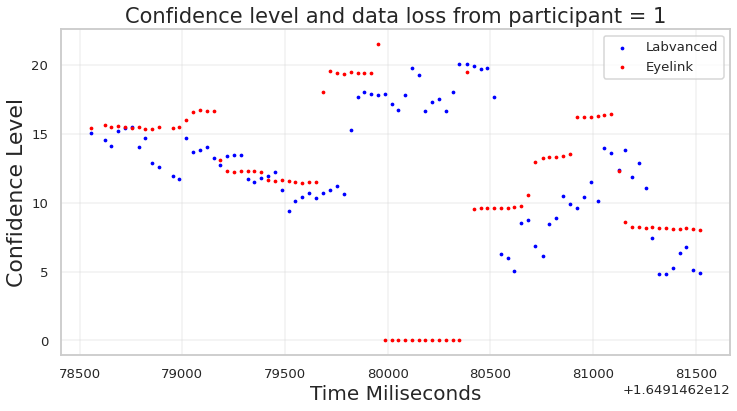

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


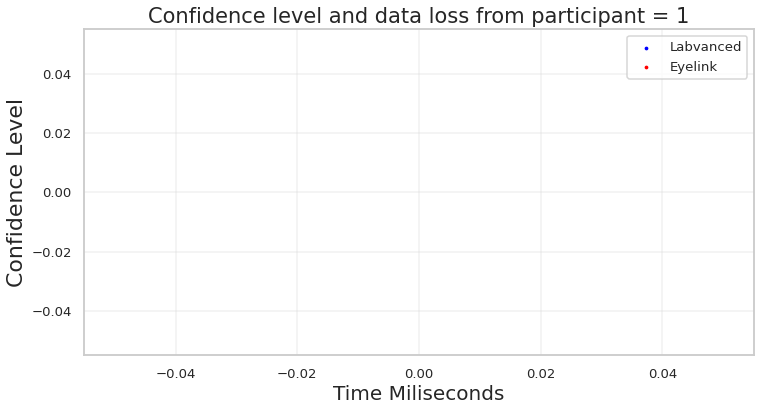

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


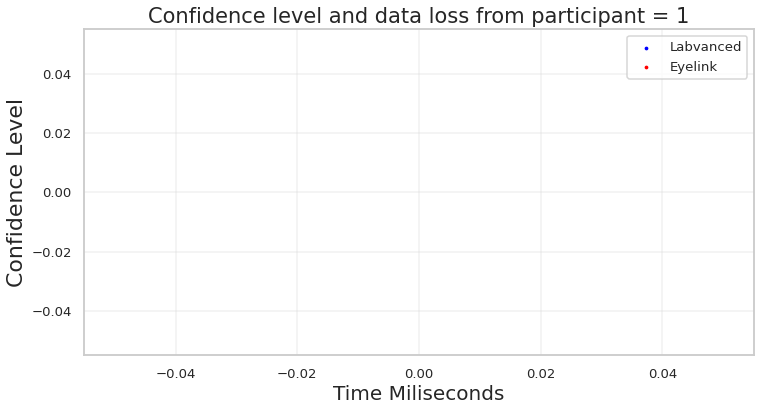

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


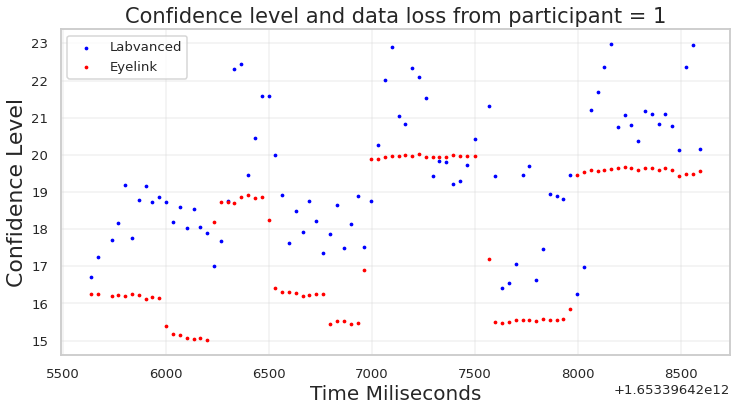

Empty DataFrame
Columns: [index, time_lb, Block_Nr, Block_Name, Task_Nr, Task_Name, Trial_Nr, Trial_Id, Exp_Subject_Id, Rec_Session_Id, Session_Nr, timestamp, X_lb, Y_lb, c, Participant_Nr_x, X_el, Y_el, Tracker_Time, Participant_Nr_y, t_from_0]
Index: []

[0 rows x 21 columns]


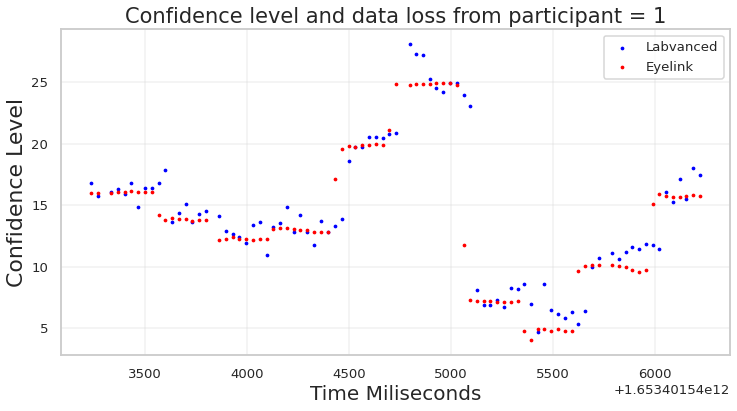

In [19]:
participants = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
def plottingBlinks(subject, trial):    
    df_trial = df_blinks
    df_p = df
    df_p['t_from_0'] = df_p['time_lb'].diff().cumsum().fillna(0)
    df_trial['t_from_0'] = df_trial['time_lb'].diff().cumsum().fillna(0)
    df_trial = df_trial.loc[(df_trial['Participant_Nr_x']== subject)]
    df_p = df_p.loc[(df_p['Participant_Nr_x']== subject)]
    df_p = df_p.loc[df_p['Trial_Nr']== trial]
    df_trial = df_trial.loc[df_trial['Trial_Nr']==trial]
    print(df_trial)
#     print(df_trial)
#     df_p = df_p.loc[(df_p['Participant_Nr_x']== subject)]
    
    fig, ax = plt.subplots(1, figsize=(12, 6))
    fig.patch.set_facecolor('white')
    plt.scatter(df_p.time_lb, df_p.X_lb, color = 'blue', s=5, label='Labvanced')
    plt.scatter(df_p.time_lb, df_p.X_el, color = 'red', s=5, label='Eyelink')
    df_trial['data_loss'] = 0
    # BLinks
#     plt.plot(df_p.time_lb, df_p.c, color = 'blue', label='Labvanced Confidence')
#     plt.scatter(df_trial.time_lb, df_trial.data_loss, color = 'red', label='Eyelink Events Detected')
    
#     plt.scatter(df_p.time_lb, df_p.c, color = 'blue', s=15, label='Labvanced Confidence')
#     plt.scatter(df_trial.time_lb, df_trial.data_loss,s=15, color = 'red', label='Eyelink Events Detected')
    # plt.scatter(lb_gaze.time_lb, lb_gaze.X_lb, color = 'blue', s=5, label='Labvanced')
    ax.set_title('Confidence level and data loss from participant = 1', fontsize=21)
    ax.set_ylabel('Confidence Level',fontsize=22)
    ax.set_xlabel('Time Miliseconds',fontsize=20)

    #     ax.legend(fontsize="x-large", loc='lower right') # using a named size
    ax.grid(linewidth = 0.4)
    ax.legend()
    ax.grid()

#     ax.legend(fontsize="x-large", loc='lower right') # using a named size
    ax.grid(linewidth = 0.4)
    ax.legend()
    ax.grid()
    # ax.set_ylim(-10,25)
    # plt.gcf().autofmt_xdate()
    plt.show()
for i in range(len(participants)):
    plottingBlinks(i, 10)